#  EDA




###### Présented by Boris TCHAGUE 






.

savoir charger un dataset,

analyse des valeurs manquantes et dupliquées,
analyse des outliers,
analyse univariée,
analyse multivariée,
ainsi que toute analyse qui vous semble judicieuse pour prédire le succès d’un projet Kickstarter.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import text

## 1. Découverte de Données

In [5]:
df = pd.read_csv('C:/Users/Boris/Desktop/exam/dataset.csv')
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [28]:
df.shape
print('Notre Dataset contient {} Lignes et {} Colonnes.'.format(df.shape[0], df.shape[1]))

Notre Dataset contient 378661 Lignes et 15 Colonnes.


In [32]:
list(df)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


###### Notre dataset est constitué de 15 variables dont 8 qualitatives et 7 quantitatives.  Il nous est necessaire de modifier la variable "usd pledged" pour faciliter son utilisation plus tard.  

In [34]:
df = df.rename(index = str, columns={'usd pledged' : 'usd_pledged'})

In [35]:
df.describe()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


###### On remarque que l'écart type et la moyenne des "backers" samble important comparé aux autres variables. 


# 2. Analyse des valeurs manquantes et dupliquées

In [ ]:
df.duplicated().sum()

###### Aucune valeur n'a été dupliqué 

In [36]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

######  la variable "usd_pledged" a 3797 valeurs manquantes et 4 Noms n'ont pas été renseignés 

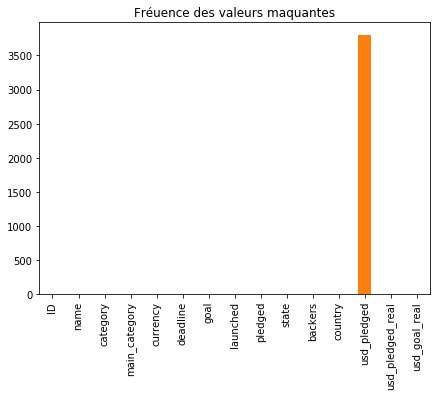

In [38]:
df.isna().sum().plot.bar(
                title = 'Fréuence des valeurs maquantes',
                figsize =(7,5))

 df.count().plot.bar(
            title = 'Fréuence des valeurs de valeur non nul par variable',
            figsize =(6,6))

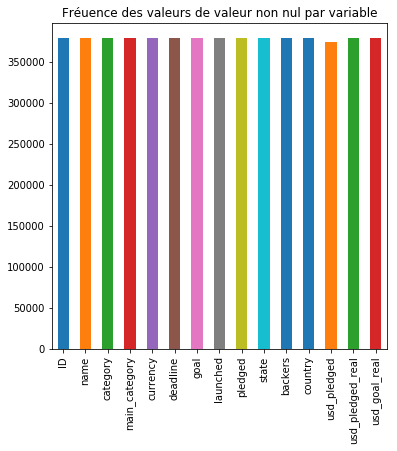

In [40]:
df.count().plot.bar(
            title = 'Fréuence des valeurs de valeur non nul par variable',
            figsize =(6,6))

In [43]:
print(df.usd_pledged.count()/len(df)*100)

98.99725612091027


###### D'après les 2 bar chat précédents, "usd_pledged" est suffisament représenté dans le Dataset, sa colonne a été renseigné a 98%.  Pour les valeurs manquantes nous les remplacons par la moyenne des valeurs. 

In [ ]:
moy_usdpledged = df['usd_pledged'].mean()
df.usd_pledged.fillna(moy_usdpledged, inplace=True)
df.usd_pledged.isna().sum()

# 3. Analyse des outliers

In [ ]:
h = df.boxplot(['pledged', 'backers', 'usd_pledged', 'usd_pledged_real'])

In [ ]:
h2 = sns.swarmplot(df.backers)
plt.show()

# 4.Analyse univarié 